# 2024 CVE CWE Review 

In [1]:
%%capture
#!rm nvd.jsonl
#!wget -q https://nvd.handsonhacking.org/nvd.jsonl

In [2]:
from IPython.core.magic import register_cell_magic
from IPython.display import Markdown
import datetime
from datetime import date
import glob
import json
import logging
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly
import warnings
import calplot
from itables import init_notebook_mode, show
import itables.options as opt

opt.dom = "tpir"
opt.style = "table-layout:auto;width:auto"
init_notebook_mode(all_interactive=True, connected=True)

@register_cell_magic
def markdown(line, cell):
    return Markdown(cell.format(**globals()))


logging.getLogger('matplotlib.font_manager').disabled = True
warnings.filterwarnings("ignore")
pd.set_option('display.width', 500)
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 10)

In [3]:
row_accumulator = []
for filename in glob.glob('nvd.jsonl'):
    with open(filename, 'r', encoding='utf-8') as f:
        nvd_data = json.load(f)
        for entry in nvd_data:
            cve = entry['cve']['id']
            try:
                assigner = entry['cve']['sourceIdentifier']
            except KeyError:
                assigner = 'Missing_Data'
            try:
                published_date = entry['cve']['published']
            except KeyError:
                published_date = 'Missing_Data'
            try:
                attack_vector = entry['cve']['metrics']['cvssMetricV31'][0]['cvssData']['attackVector']
            except KeyError:
                attack_vector = 'Missing_Data'
            try:
                attack_complexity = entry['cve']['metrics']['cvssMetricV31'][0]['cvssData']['attackComplexity']
            except KeyError:
                attack_complexity = 'Missing_Data'
            try:
                privileges_required = entry['cve']['metrics']['cvssMetricV31'][0]['cvssData']['privilegesRequired']
            except KeyError:
                privileges_required = 'Missing_Data'
            try:
                user_interaction = entry['cve']['metrics']['cvssMetricV31'][0]['cvssData']['userInteraction']
            except KeyError:
                user_interaction = 'Missing_Data'
            try:
                scope = entry['cve']['metrics']['cvssMetricV31'][0]['cvssData']['scope']
            except KeyError:
                scope = 'Missing_Data'
            try:
                confidentiality_impact = entry['cve']['metrics']['cvssMetricV31'][0]['cvssData']['confidentialityImpact']
            except KeyError:
                confidentiality_impact = 'Missing_Data'
            try:
                integrity_impact = entry['cve']['metrics']['cvssMetricV31'][0]['cvssData']['integrityImpact']
            except KeyError:
                integrity_impact = 'Missing_Data'
            try:
                availability_impact = entry['cve']['metrics']['cvssMetricV31'][0]['cvssData']['availabilityImpact']
            except KeyError:
                availability_impact = 'Missing_Data'
            try:
                base_score = entry['cve']['metrics']['cvssMetricV31'][0]['cvssData']['baseScore']
            except KeyError:
                base_score = '0.0'
            try:
                base_severity = entry['cve']['metrics']['cvssMetricV31'][0]['cvssData']['baseSeverity']
            except KeyError:
                base_severity = 'Missing_Data'
            try:
                exploitability_score = entry['cve']['metrics']['cvssMetricV31'][0]['exploitabilityScore']
            except KeyError:
                exploitability_score = 'Missing_Data'
            try:
                impact_score = entry['cve']['metrics']['cvssMetricV31'][0]['impactScore']
            except KeyError:
                impact_score = 'Missing_Data'
            try:
                cwe = entry['cve']['weaknesses'][0]['description'][0]['value']
            except KeyError:
                cwe = 'Missing_Data'
            try:
                description = entry['cve']['descriptions'][0]['value']
            except IndexError:
                description = ''
            try: 
                vulnStatus = entry['cve']['vulnStatus']
            except IndexError:
                vulnStatus = ''  
            new_row = {
                'CVE': cve,
                'Published': published_date,
                'AttackVector': attack_vector,
                'AttackComplexity': attack_complexity,
                'PrivilegesRequired': privileges_required,
                'UserInteraction': user_interaction,
                'Scope': scope,
                'ConfidentialityImpact': confidentiality_impact,
                'IntegrityImpact': integrity_impact,
                'AvailabilityImpact': availability_impact,
                'BaseScore': base_score,
                'BaseSeverity': base_severity,
                'ExploitabilityScore': exploitability_score,
                'ImpactScore': impact_score,
                'CWE': cwe,
                'Description': description,
                'Assigner' : assigner,
                'Status': vulnStatus 
            }
            row_accumulator.append(new_row)
        nvd = pd.DataFrame(row_accumulator)

nvd = nvd[~nvd.Status.str.contains('Rejected')]
nvd['Published'] = pd.to_datetime(nvd['Published'])
thisyear = ((nvd['Published'] > '2024-01-01') & (nvd['Published']  < '2025-01-01'))
nvd = nvd.loc[thisyear]
nvd = nvd.sort_values(by=['Published'])
nvd = nvd.reset_index(drop=True)
nvd['BaseScore'] = pd.to_numeric(nvd['BaseScore']);
nvd['BaseScore'] = pd.to_numeric(nvd['BaseScore']);
nvd['BaseScore'] = nvd['BaseScore'].replace(0, np.nan);
nvdcount = nvd['Published'].count()
nvdunique = nvd['Published'].nunique()
startdate = date(2024, 1, 1)
enddate  = date(2025,1,1)
numberofdays = enddate - startdate 
per_day = nvdcount/numberofdays.days

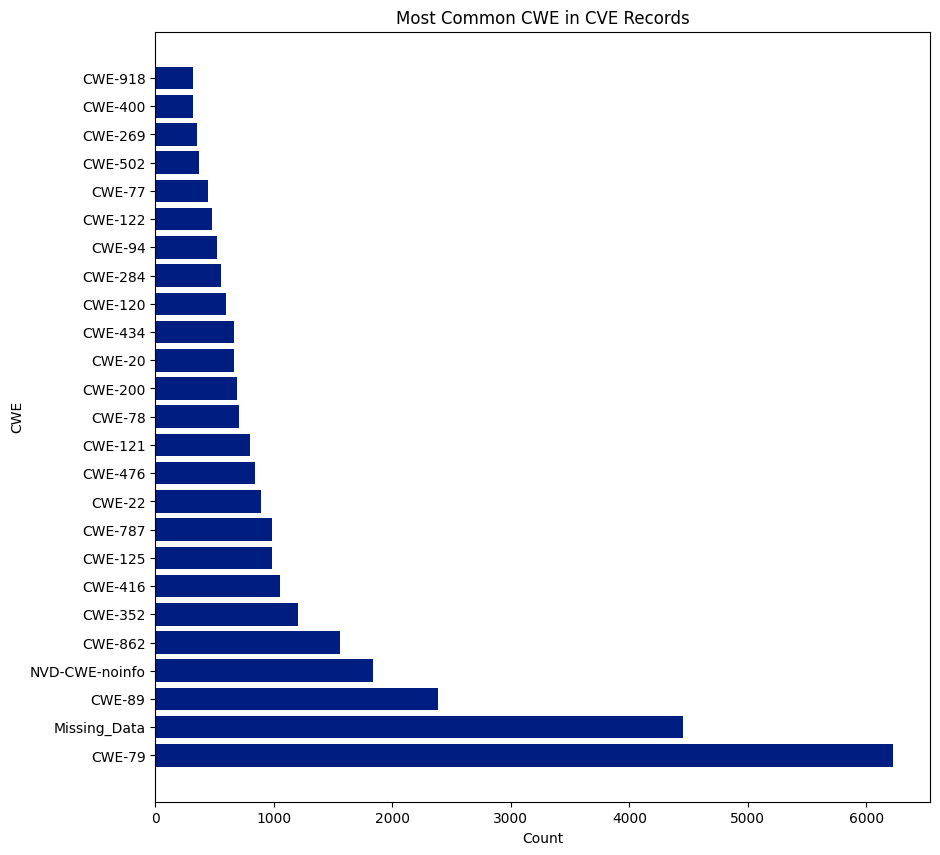

In [4]:
nvd_cwe = nvd['CWE'].value_counts()
nvd_cwe = nvd_cwe.reset_index()
nvd_cwe.columns = ['CWE', 'Counts']
nvd_cwe['Percentage'] = ( nvd_cwe['Counts'] / 
                       nvd_cwe['Counts'].sum()) * 100
nvd_cwe_graph = nvd_cwe[nvd_cwe.Counts > 100].head(25)
plt.figure(figsize=(10,10));
plt.barh("CWE", "Counts", data = nvd_cwe_graph, color="#001d82");
plt.xlabel("Count"); 
plt.ylabel("CWE") ;
plt.title("Most Common CWE in CVE Records");

In [5]:
nvd_cwe.head(25).round(2)

CWE  Counts  Percentage
0           CWE-79    6227       15.56
1     Missing_Data    4456       11.14
2           CWE-89    2389        5.97
3   NVD-CWE-noinfo    1836        4.59
4          CWE-862    1558        3.89
5          CWE-352    1203        3.01
6          CWE-416    1049        2.62
7          CWE-125     988        2.47
8          CWE-787     985        2.46
9           CWE-22     891        2.23
10         CWE-476     838        2.09
11         CWE-121     800        2.00
12          CWE-78     709        1.77
13         CWE-200     688        1.72
14          CWE-20     665        1.66
15         CWE-434     660        1.65
16         CWE-120     595        1.49
17         CWE-284     553        1.38
18          CWE-94     520        1.30
19         CWE-122     480        1.20
20          CWE-77     441        1.10
21         CWE-502     370        0.92
22         CWE-269     348        0.87
23         CWE-400     322        0.80
24         CWE-918     321        0.80

In [6]:
nvd_cwe.loc[nvd_cwe['Counts'] == 1].head(50)

CWE  Counts  Percentage
417  CWE-1250       1    0.002499
418   CWE-147       1    0.002499
419   CWE-615       1    0.002499
420   CWE-539       1    0.002499
421   CWE-237       1    0.002499
422   CWE-527       1    0.002499
423  CWE-1025       1    0.002499
424  CWE-1270       1    0.002499
425   CWE-172       1    0.002499
426   CWE-784       1    0.002499
427   CWE-199       1    0.002499
428  CWE-1057       1    0.002499
429  CWE-1037       1    0.002499
430   CWE-441       1    0.002499
431   CWE-692       1    0.002499
432   CWE-386       1    0.002499
433   CWE-686       1    0.002499
434   CWE-570       1    0.002499
435  CWE-1125       1    0.002499
436   CWE-177       1    0.002499
437   CWE-826       1    0.002499
438   CWE-292       1    0.002499
439    CWE-66       1    0.002499
440   CWE-925       1    0.002499
441   CWE-173       1    0.002499
442   CWE-371       1    0.002499
443   CWE-337       1    0.002499
444   CWE-235       1    0.002499
445   CWE-842       1    0.002499
446   CWE-528       1    0.002499
447  CWE-1260       1    0.002499
448   CWE-431       1    0.002499
449  CWE-1050       1    0.002499
450   CWE-828       1    0.002499
451  CWE-1051       1    0.002499
452   CWE-414       1    0.002499
453   CWE-265       1    0.002499
454   CWE-627       1    0.002499
455   CWE-289       1    0.002499
456    CWE-40       1    0.002499
457   CWE-360       1    0.002499
458   CWE-275       1    0.002499
459   CWE-141       1    0.002499
460   CWE-657       1    0.002499
461  CWE-1223       1    0.002499
462   CWE-605       1    0.002499
463   CWE-641       1    0.002499
464   CWE-786       1    0.002499
465   CWE-566       1    0.002499
466   CWE-366       1    0.002499

In [7]:
nvd_cwe.loc[nvd_cwe['Counts'] == 1].describe()

Counts    Percentage
count   110.0  1.100000e+02
mean      1.0  2.499438e-03
std       0.0  4.356657e-19
min       1.0  2.499438e-03
25%       1.0  2.499438e-03
50%       1.0  2.499438e-03
75%       1.0  2.499438e-03
max       1.0  2.499438e-03

In [8]:
nvd_cwe.describe()

Counts  Percentage
count   527.000000  527.000000
mean     75.918406    0.189753
std     386.376876    0.965725
min       1.000000    0.002499
25%       2.000000    0.004999
50%       5.000000    0.012497
75%      21.000000    0.052488
max    6227.000000   15.563998